<a href="https://colab.research.google.com/github/PosgradoMNA/Equipo_10/blob/main/Reto2_AguasSuperficiales_Equipo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto 1: AGUAS SUPERFICIALES**
##Ciencia y Analítica de datos

Profesor: Dr. María de la Paz Rico

Alumnas: 
  - Valeria Alejandra Ramirez Herrera A01240716
  - Evelyn Aylin Rendón Medina A01748750

Fecha: 16/Noviembre/2022



## Librerías

In [189]:
#Importamos la siguiente librería para poder usar geopandas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
#Hacemos la importación de todas las librerías que usaremos
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
import qeds
qeds.themes.mpl_style();
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
import math
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point

import requests 
from zipfile import ZipFile
import os
from io import BytesIO

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve, RepeatedKFold 

##**Limpieza, análisis, visualización y agrupamiento.**

Limpieza de base de datos.
Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
- Identificando tendencias centrales promedio, media y mediana de los datos. 
- Identificar medidas de dispersión, máximo, mínimo .
- Identificar medidas de posición no centrales , los cuartiles , outliers.   
- Identificar correlaciones.
- Preparar los datos 
- Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
- Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [191]:
#El archivo csv debe cargase en cada nueva sesión
# df = pd.read_csv('/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', 
#                  encoding='latin-1') #Ponemos esto para evitar el error
# df

In [192]:
#Hacemos la importación del dataset de AGUAS SUPERFICIALES
sub = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(sub)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding = 'latin1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
#Exploración del dataframe previo a su limpieza
#De forma que podemos analizar sus estadísticas, como sus cuartiles, promedio, desviación, valores máximos y mínimos
df.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [194]:
#Con la función shape, vemos la dimensión de nuestro dataset
df.shape

(4141, 55)

In [195]:
#Usamos la función isnull para revisar en cuáles variables tenemos valores nulos
#como se puede observar, en todas falta al menos un valor
df.isnull().any()

CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

In [196]:
#Con la función de info, tenemos información adicional de cuántos valores no nulos tenemos en
#el dataset, además del tipo de dato que se maneja en cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [197]:
#df1 = df.copy()
#df1['DBO_mg/L']

In [198]:
#Hacemos tres particiones al dataset con base en la variable SEMAFORO
#ya que más adelante en el reto se solicita, así que consideramos buena idea 
#hacer la partición del dataset de esa forma.

df_Verde = pd.DataFrame(df[df['SEMAFORO'] == 'Verde'])
df_Amarillo = pd.DataFrame(df[df['SEMAFORO'] == 'Amarillo'])
df_Rojo = pd.DataFrame(df[df['SEMAFORO'] == 'Rojo'])



In [199]:
#Mandamos llamar el dataframe para lo que tiene categoría Verde
df_Verde

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,OCRBR5119M1,LAGUNA MADRE HUMEDAL 6,RIO BRAVO,TAMAULIPAS,MATAMOROS,LAGUNA MADRE NORTE,LAGUNA MADRE,COSTERO (HUMEDAL),LAGUNA,-97.46439,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3456,OCRBR5120M1,LAGUNA MADRE HUMEDAL 7,RIO BRAVO,TAMAULIPAS,MATAMOROS,LAGUNA MADRE NORTE,LAGUNA MADRE,COSTERO (HUMEDAL),LAGUNA,-97.47659,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3480,OCRBR5183M1,"SITIO 1, CANAL DE LLAMADA TOMA NORTE MUESTRA S...",RIO BRAVO,TAMAULIPAS,MIGUEL ALEMAN,RIO SAN JUAN 3,PRESA MARTE R. GOMEZ,LENTICO (HUMEDAL),PRESA,-98.95864,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
3486,OCRBR5202M1,PRESA INTERNACIONAL FALCON 6,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,PRESA INTERNACIONAL FALCON,LENTICO (HUMEDAL),PRESA,-99.24931,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO


In [200]:
#Mandamos llamar el dataframe para lo que tiene categoría Amarillo
df_Amarillo


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
8,DLBAJ109,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
9,DLBAJ112,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,...,"OD%L,",SI,SI,SI,SI,SI,ND,NO,SI,LOTICO
10,DLBAJ120M1,BOCA DE LA SIERRA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),ARROYO,-109.82610,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
11,DLBAJ121,HUMEDAL OASIS DE LA SIERRA EL PILAR 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LAS POCITAS-SAN HILARIO,HUMEDAL OASIS DE LA SIERRA EL PILAR 1,LOTICO (HUMEDAL),ARROYO,-110.95153,...,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
13,DLBAJ124,MANANTIAL CADUAÑO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),CANAL,-109.77912,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,ND,SI,LOTICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,OCRBR5195M1,RIO ALAMO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,MIER,RIO ALAMO,RIO ALAMO,LOTICO,RIO,-99.15277,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3485,OCRBR5196M1,100 M AGUAS ABAJO DE LA PRESA FALCON,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 12,RIO BRAVO,LOTICO,RIO,-99.17006,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3488,OCRBR5206M1,RIO SALADO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,RIO SALADO,LOTICO,RIO,-99.42142,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3491,OCRBR5209M1,RIO BRAVO FRENTE A COMAPA,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 10,RIO BRAVO,LOTICO,RIO,-99.52221,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO


In [201]:
#Mandamos llamar el dataframe para lo que tiene categoría Rojo
df_Rojo

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
7,DLBAJ106W2,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,NO,NO,SI,COSTERO
35,DLBAJ160,"PLAYA SANTA ROSALIA SEG23, 1 ISA8A",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SANTA ROSALIA,GOLFO DE CALIFORNIA,COSTERO,OCEANO-MAR,-112.26933,...,"ENT_FEC,",ND,ND,SI,ND,ND,NO,SI,SI,COSTERO
58,DLBAJ194,RIO LA PURISIMA 2,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,MEZQUITAL SECO,RIO LA PURISIMA,LOTICO (HUMEDAL),ARROYO,-112.12748,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,ND,SI,LOTICO
59,DLBAJ195,BAHIA MAGDALENA (PUERTO ADOLFO LOPEZ MATEOS),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,LA PURISIMA,BAHIA MAGDALENA,COSTERO,BAHIA,-112.12343,...,"ENT_FEC,",ND,ND,SI,ND,ND,NO,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,OCRBR5149M2,LAGUNA LA ESCONDIDA (ENTRADA),RIO BRAVO,TAMAULIPAS,REYNOSA,RIO BRAVO 13,LAGUNA LA ESCONDIDA,LENTICO,LAGUNA,-98.28476,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO
3481,OCRBR5191M1,"SITIO 5, CANAL DE LLAMADA TOMA SUR MUESTRA SUP...",RIO BRAVO,TAMAULIPAS,CAMARGO,RIO SAN JUAN 3,PRESA MARTE R. GOMEZ,LENTICO (HUMEDAL),PRESA,-98.92999,...,"DQO,",SI,NO,SI,SI,SI,ND,SI,SI,LENTICO
3483,OCRBR5194M2,LAGUNA LA ESCONDIDA AL NORTE DEL CENTRO CULTUR...,RIO BRAVO,TAMAULIPAS,REYNOSA,RIO BRAVO 13,LAGUNA LA ESCONDIDA,LENTICO,LAGUNA,-98.27113,...,"DQO,CF,E_COLI,",SI,NO,SI,NO,NO,ND,SI,SI,LENTICO
3489,OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO


In [202]:
from pandas.core.arrays.base import maybe_cast_to_extension_array
#Hacemos la separación de las variables del data set original en tres tipos

Numericas = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL',
             'OD_PORC','OD_PORC_SUP','OD_PORC_MED', 'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT',
             'TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT'
             ]

Categoricas = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC',
               'CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED', 'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48',
               'CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15'
               ]

Categoricas_Cumple = ['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI', 
                      'CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX'
                      ]



#Imprimimos el número de variables numéricas, para saber con cuántas vamos a trabajar
print(len(Numericas))



16


In [203]:
#En el dataset existen muchos valores nulos, y hacer una normalización general no sería lo correcto ya que podríamos llegar
#a tener bueno valores en una categoría mala o viceversa, así que a continuación se colocarán los valores promedio(mean)
#por categoría del semáforo para tener un valor más exacto a la categoría correspondiente.


promedio_Verdes = list()
promedio_Rojos = list()
promedio_Amarillos = list()
nombres = list()

for name in Numericas:
  df_Verde[name]=  df_Verde[name].astype('str')
  df_Verde[name] = df_Verde[name].str.replace('<1','1') 
  df_Verde[name] = df_Verde[name].str.replace('<2','2') 
  df_Verde[name] = df_Verde[name].str.replace('<3','3') 
  df_Verde[name] = df_Verde[name].str.replace('<10','10') 
  df_Verde[name]= df_Verde[name].astype('float')
  meanV = df_Verde[name].mean()
  df_Verde[name] = df_Verde[name].replace(np.nan,meanV)
  print("Promedio Verde ",name,meanV)
  promedio_Verdes.append(meanV)
  nombres.append(name)
print("\n")


for name in Numericas:
  df_Amarillo[name]= df_Amarillo[name].astype('str')
  df_Amarillo[name] = df_Amarillo[name].str.replace('<1','1') 
  df_Amarillo[name] = df_Amarillo[name].str.replace('<2','2') 
  df_Amarillo[name] = df_Amarillo[name].str.replace('<3','3') 
  df_Amarillo[name] = df_Amarillo[name].str.replace('<10','10') 
  df_Amarillo[name]= df_Amarillo[name].astype('float')
  meanA = df_Amarillo[name].mean()
  df_Amarillo[name] = df_Amarillo[name].replace(np.nan,meanA)
  print("Promedio Amarillo ",name,meanA)
  promedio_Amarillos.append(meanA)

print("\n")

for name in Numericas:
  df_Rojo[name]= df_Rojo[name].astype('str')
  df_Rojo[name] = df_Rojo[name].str.replace('<1','1') 
  df_Rojo[name] = df_Rojo[name].str.replace('<2','2') 
  df_Rojo[name] = df_Rojo[name].str.replace('<3','3') 
  df_Rojo[name] = df_Rojo[name].str.replace('<10','10') 
  df_Rojo[name]= df_Rojo[name].astype('float')
  meanR = df_Rojo[name].mean()
  df_Rojo[name] = df_Rojo[name].replace(np.nan,meanR)
  print("Promedio Rojo ",name,meanR)
  promedio_Rojos.append(maybe_cast_to_extension_array)

print("\n")

Promedio Verde  DBO_mg/L 3.37219152854512
Promedio Verde  DQO_mg/L 18.24123020257827
Promedio Verde  SST_mg/L 24.81005595895817
Promedio Verde  COLI_FEC_NMP_100mL 281.20588235294116
Promedio Verde  E_COLI_NMP_100mL 91.06985294117646
Promedio Verde  ENTEROC_NMP_100mL 18.5822625698324
Promedio Verde  OD_PORC 75.42557251908397
Promedio Verde  OD_PORC_SUP 82.64989604989606
Promedio Verde  OD_PORC_MED 78.64151624548737
Promedio Verde  OD_PORC_FON 74.51757679180888
Promedio Verde  TOX_D_48_UT 1.0065131086142323
Promedio Verde  TOX_V_15_UT 1.0092097378277154
Promedio Verde  TOX_D_48_SUP_UT 1.0112635379061372
Promedio Verde  TOX_D_48_FON_UT nan
Promedio Verde  TOX_FIS_SUP_15_UT 1.0
Promedio Verde  TOX_FIS_FON_15_UT nan


Promedio Amarillo  DBO_mg/L 3.821706363636364
Promedio Amarillo  DQO_mg/L 18.644802727272726
Promedio Amarillo  SST_mg/L 93.37644273127754
Promedio Amarillo  COLI_FEC_NMP_100mL 12109.446363636363
Promedio Amarillo  E_COLI_NMP_100mL 6901.5372727272725
Promedio Amarillo  ENTEROC

In [204]:
#Hacemos una lista para cada uno de los colores del semaforo Verde, Amarillo[2], y Rojo[3] y la categoría resultante se unirá al dataframe
#previamente asignado para cada uno de los colores y saber qué es un buen valor para cada uno


b=0
superficiales_list =list()
superficiales_list2 = list()
superficiales_list3 = list()

for name in Numericas: 
 superficiales_list.append([promedio_Verdes[b],nombres[b]])
 b=b+1

#Se agrega el tipo de categoría a las que tengan los valores del Semaforo en verde que van desde una baja toxicidad a una Excelente calidad

catVerdes = ['Buena','Buena','Excelente','Aceptable','Excelente','Excelente','Excelente','Excelente','Excelente',
             'Excelente','Toxico-Bajo','Toxico-Bajo','Toxico-Bajo','NaN','Toxico-Bajo','NaN']


df_promedioVerdes = pd.DataFrame (superficiales_list, columns = ['Valores para datos Verdes','Nombre'])
df_promedioVerdes['Categoria-Calidad'] = catVerdes
df_promedioVerdes['Categorias-Quimicos'] = Categoricas
df_promedioVerdes

,Valores para datos Verdes,Nombre,Categoria-Calidad,Categorias-Quimicos
0,3.372192,DBO_mg/L,Buena,CALIDAD_DBO
1,18.241230,DQO_mg/L,Buena,CALIDAD_DQO
2,24.810056,SST_mg/L,Excelente,CALIDAD_SST
3,281.205882,COLI_FEC_NMP_100mL,Aceptable,CALIDAD_COLI_FEC
4,91.069853,E_COLI_NMP_100mL,Excelente,CALIDAD_E_COLI
5,18.582263,ENTEROC_NMP_100mL,Excelente,CALIDAD_ENTEROC
6,75.425573,OD_PORC,Excelente,CALIDAD_OD_PORC
7,82.649896,OD_PORC_SUP,Excelente,CALIDAD_OD_PORC_SUP
8,78.641516,OD_PORC_MED,Excelente,CALIDAD_OD_PORC_MED
9,74.517577,OD_PORC_FON,Excelente,CALIDAD_OD_PORC_FON


In [205]:
#Mismo proceso que las líneas anteriores, pero ahora para el dataframe Amarillo
b=0
for name in Numericas: 
 superficiales_list2.append([promedio_Amarillos[b],nombres[b]])
 b=b+1

#Se agrega el tipo de categoría a las que tengan los valores del Semaforo en Amarillo que va desde una toxicidad baja a empezar con
#valores contaminación alta, y estos datos ahora son agregados al dataframe Amarillo

catAmarillos = ['Buena','Buena','Aceptable','Contaminación alta','Contaminación alta','Excelente','Excelente','Excelente','Buena','Buena',
             'Toxico-Bajo','Toxico-Bajo','Toxico-Bajo','NaN','Toxico-Bajo','NaN']

df_promedioAmarillos = pd.DataFrame (superficiales_list2, columns = ['Valores para datos Amarillos','Nombre'])
df_promedioAmarillos['Categoria-Calidad'] = catAmarillos
df_promedioAmarillos['Categorias-Quimicos'] = Categoricas
df_promedioAmarillos

,Valores para datos Amarillos,Nombre,Categoria-Calidad,Categorias-Quimicos
0,3.821706,DBO_mg/L,Buena,CALIDAD_DBO
1,18.644803,DQO_mg/L,Buena,CALIDAD_DQO
2,93.376443,SST_mg/L,Aceptable,CALIDAD_SST
3,12109.446364,COLI_FEC_NMP_100mL,Contaminación alta,CALIDAD_COLI_FEC
4,6901.537273,E_COLI_NMP_100mL,Contaminación alta,CALIDAD_E_COLI
5,39.628571,ENTEROC_NMP_100mL,Excelente,CALIDAD_ENTEROC
6,77.476428,OD_PORC,Excelente,CALIDAD_OD_PORC
7,87.246667,OD_PORC_SUP,Excelente,CALIDAD_OD_PORC_SUP
8,62.990196,OD_PORC_MED,Buena,CALIDAD_OD_PORC_MED
9,53.175817,OD_PORC_FON,Buena,CALIDAD_OD_PORC_FON


In [206]:
#Mismo procesos que las líneas anteriores, pero ahora para el dataframe Rojo
b=0
for name in Numericas: 
 superficiales_list3.append([promedio_Rojos[b],nombres[b]])
 b=b+1

#Se agrega el tipo de categoría a las que tengan los valores del Semaforo en Rojo que va desde una toxicidad baja a empezar con
#valores fuertemente contaminada, y estos datos ahora son agregados al dataframe Rojo


catRojos = ['Contaminada','Contaminada','Contaminada','Fuertemente contaminada','Fuertemente contaminada','Fuertemente contaminada','Aceptable','Excelente','Buena Calidad',
             'Buena Calidad','Toxicidad Baja','Toxicidad moderada','Toxicidad Baja','NaN','Toxicidad Baja','NaN']

df_promedioRojos = pd.DataFrame (superficiales_list3, columns = ['Valores para datos Rojos','Nombre'])
df_promedioRojos['Categoria-Calidad'] = catRojos
df_promedioRojos['Categorias-Quimicos'] = Categoricas
df_promedioRojos

,Valores para datos Rojos,Nombre,Categoria-Calidad,Categorias-Quimicos
0,<function maybe_cast_to_extension_array at 0x7...,DBO_mg/L,Contaminada,CALIDAD_DBO
1,<function maybe_cast_to_extension_array at 0x7...,DQO_mg/L,Contaminada,CALIDAD_DQO
2,<function maybe_cast_to_extension_array at 0x7...,SST_mg/L,Contaminada,CALIDAD_SST
3,<function maybe_cast_to_extension_array at 0x7...,COLI_FEC_NMP_100mL,Fuertemente contaminada,CALIDAD_COLI_FEC
4,<function maybe_cast_to_extension_array at 0x7...,E_COLI_NMP_100mL,Fuertemente contaminada,CALIDAD_E_COLI
5,<function maybe_cast_to_extension_array at 0x7...,ENTEROC_NMP_100mL,Fuertemente contaminada,CALIDAD_ENTEROC
6,<function maybe_cast_to_extension_array at 0x7...,OD_PORC,Aceptable,CALIDAD_OD_PORC
7,<function maybe_cast_to_extension_array at 0x7...,OD_PORC_SUP,Excelente,CALIDAD_OD_PORC_SUP
8,<function maybe_cast_to_extension_array at 0x7...,OD_PORC_MED,Buena Calidad,CALIDAD_OD_PORC_MED
9,<function maybe_cast_to_extension_array at 0x7...,OD_PORC_FON,Buena Calidad,CALIDAD_OD_PORC_FON


In [207]:
#valor = df_promedioVerdes[df_promedioVerdes['Categorias-Quimicos'] == 'CALIDAD_DBO']
#valora= valor.loc[0]['Valores para datos Verdes']
#valorb = valor.loc[0]['Categoria-Calidad']

#valor = df_promedioVerdes[df_promedioVerdes['Categorias-Quimicos'] == 'CALIDAD_DQO']
#valorc= valor.loc[1]['Valores para datos Verdes']
#valord = valor.loc[1]['Categoria-Calidad']

#valord

In [208]:
#Ahora se llenarán los espacios en blanco con el cambio a string del tipo de variable y se reemplazarán por NaN
#Esto solo para el dataframe Verde
i=0
for name in Categoricas:
   
    valor = df_promedioVerdes[df_promedioVerdes['Categorias-Quimicos'] == name]
    valoracion= valor.loc[i]['Categoria-Calidad']
    df_Verde[name]= df_Verde[name].astype('str')
    df_Verde[name]= df_Verde[name].replace('nan', valoracion)
    i=i+1

#.info() para confirmar que todos los demás campos no falta algún valor, solo quedaron las variables que desde un principio 
#no tenían valores
df_Verde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 1 to 3487
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   1267 non-null   object 
 1   SITIO                   1267 non-null   object 
 2   ORGANISMO_DE_CUENCA     1267 non-null   object 
 3   ESTADO                  1267 non-null   object 
 4   MUNICIPIO               1267 non-null   object 
 5   CUENCA                  1266 non-null   object 
 6   CUERPO DE AGUA          1259 non-null   object 
 7   TIPO                    1267 non-null   object 
 8   SUBTIPO                 1259 non-null   object 
 9   LONGITUD                1267 non-null   float64
 10  LATITUD                 1267 non-null   float64
 11  PERIODO                 1267 non-null   float64
 12  DBO_mg/L                1267 non-null   float64
 13  CALIDAD_DBO             1267 non-null   object 
 14  DQO_mg/L                1267 non-null   

In [209]:
#Ahora se llenarán los espacios en blanco con el cambio a string del tipo de variable y se reemplazarán por NaN
#Esto solo para el dataframe Amarillo

i=0
for name in Categoricas:
   
    valor = df_promedioAmarillos[df_promedioAmarillos['Categorias-Quimicos'] == name]
    valoracion= valor.loc[i]['Categoria-Calidad']
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('nan', valoracion)
    i=i+1

 #.info() para confirmar que todos los demás campos no falta algún valor, solo quedaron las variables que desde un principio 
#no tenían valores
   
df_Amarillo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 8 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   1135 non-null   object 
 1   SITIO                   1135 non-null   object 
 2   ORGANISMO_DE_CUENCA     1135 non-null   object 
 3   ESTADO                  1135 non-null   object 
 4   MUNICIPIO               1135 non-null   object 
 5   CUENCA                  1135 non-null   object 
 6   CUERPO DE AGUA          1129 non-null   object 
 7   TIPO                    1135 non-null   object 
 8   SUBTIPO                 1129 non-null   object 
 9   LONGITUD                1135 non-null   float64
 10  LATITUD                 1135 non-null   float64
 11  PERIODO                 1135 non-null   float64
 12  DBO_mg/L                1135 non-null   float64
 13  CALIDAD_DBO             1135 non-null   object 
 14  DQO_mg/L                1135 non-null   

In [210]:
#df_Verde[Numericas]

In [211]:
#Ahora se llenarán los espacios en blanco con el cambio a string del tipo de variable y se reemplazarán por NaN
#Esto solo para el dataframe Rojo

i=0
for name in Categoricas:
   
    valor = df_promedioRojos[df_promedioRojos['Categorias-Quimicos'] == name]
    valoracion= valor.loc[i]['Categoria-Calidad']
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('nan', valoracion)
    i=i+1
    
    #.info() para confirmar que todos los demás campos no falta algún valor, solo quedaron las variables que desde un principio 
#no tenían valores
df_Rojo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 3490
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   1091 non-null   object 
 1   SITIO                   1091 non-null   object 
 2   ORGANISMO_DE_CUENCA     1091 non-null   object 
 3   ESTADO                  1091 non-null   object 
 4   MUNICIPIO               1091 non-null   object 
 5   CUENCA                  1091 non-null   object 
 6   CUERPO DE AGUA          1091 non-null   object 
 7   TIPO                    1091 non-null   object 
 8   SUBTIPO                 1091 non-null   object 
 9   LONGITUD                1091 non-null   float64
 10  LATITUD                 1091 non-null   float64
 11  PERIODO                 1091 non-null   float64
 12  DBO_mg/L                1091 non-null   float64
 13  CALIDAD_DBO             1091 non-null   object 
 14  DQO_mg/L                1091 non-null   

In [212]:
#Algunos campos del dataframe tienen valor de ND pero no da información relevante si son buenos o malos, así dependiendo del valor
#haremos el cambio a SI o NO, para ver si son relevantes

#Dataframe Verde para cada una de las variables que tiene como prefijo CUMPLE
for name in Categoricas_Cumple:
    df_Verde[name]= df_Verde[name].astype('str')
    df_Verde[name]= df_Verde[name].replace('ND', 'SI')

In [213]:
#Algunos campos del dataframe tienen valor de ND pero no da información relevante si son buenos o malos, así dependiendo del valor
#haremos el cambio a SI o NO, para ver si son relevantes

#DataFrame Amarillo para cada una de las variables que tiene como prefijo CUMPLE
for name in Categoricas_Cumple:
  if name == 'CUMPLE_CON_DBO':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'SI')
  if name == 'CUMPLE_CON_DQO':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'SI') 
  if name == 'CALIDAD_SST':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_CF':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'SI')  
  if name == 'CUMPLE_CON_TOX':
    df_Amarillo[name]= df_Amarillo[name].astype('str')
    df_Amarillo[name]= df_Amarillo[name].replace('ND', 'SI') 

In [214]:
#Algunos campos del dataframe tienen valor de ND pero no da información relevante si son buenos o malos así dependiendo del valor
#haremos el cambio a SI o NO, para ver si son relevantes

#DataFrame Rojo para cada una de las variables que tiene como prefijo CUMPLE
for name in Categoricas_Cumple:
  if name == 'CUMPLE_CON_DBO':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'NO')
  if name == 'CUMPLE_CON_DQO':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'NO') 
  if name == 'CALIDAD_SST':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_CF':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_E_COLI':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'NO') 
  if name == 'CUMPLE_CON_ENTEROC':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_OD':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'SI') 
  if name == 'CUMPLE_CON_TOX':
    df_Rojo[name]= df_Rojo[name].astype('str')
    df_Rojo[name]= df_Rojo[name].replace('ND', 'SI') 

In [215]:
#Esto indica que ya podemos crear un nuevo dataframe ya limpio con los 3 dataframes previos
#así que concatenamos los DF Verde, Amarillo y Rojo
#y podemos ver que ya no tenemos valores nulos, al menos para las variables numéricas
df_clean = pd.concat([df_Verde, df_Amarillo, df_Rojo],join='inner')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3490
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

In [216]:
#Nos quedan 3 variables con pocos valores nulos así que primero revisamos cuál es la moda de esas variables

a = df_clean['CUENCA'].mode()
print(a)

b = df_clean['CUERPO DE AGUA'].mode()

c = df_clean['SUBTIPO'].mode()

print(b)
print(c)
print(a)

0    YUCATAN (RESTO DE RH 32)
dtype: object
0    OCEANO PACIFICO
dtype: object
0    RIO
dtype: object
0    YUCATAN (RESTO DE RH 32)
dtype: object


In [217]:
#Y como verificación en caso de que tenga valores NaN, hacemos lo mismo que con las numéricas y las rellenamos con la información
#sacada de la moda en el código anterior
df_clean['CUENCA']= df_clean['CUENCA'].astype('str')
df_clean['CUENCA']= df_clean['CUENCA'].replace('nan', 'YUCATAN (RESTO DE RH 32)') 

df_clean['CUERPO DE AGUA']=df_clean['CUERPO DE AGUA'].astype('str')
df_clean['CUERPO DE AGUA']=df_clean['CUERPO DE AGUA'].replace('nan', 'OCEANO PACIFICO') 

df_clean['SUBTIPO'] = df_clean['SUBTIPO'].astype('str')
df_clean['SUBTIPO'] = df_clean['SUBTIPO'].replace('nan', 'RIO') 

In [218]:
#Quitamos las siguientes columnas del dataframe, ya que no tienen ningún dato y no hace sentido dejarlas ni rellenarlas

df_clean.drop('CALIDAD_TOX_FIS_FON_15',axis='columns',inplace=True)
df_clean.drop('TOX_FIS_FON_15_UT',axis='columns',inplace=True)
df_clean.drop('CALIDAD_TOX_D_48_FON',axis='columns',inplace=True)
df_clean.drop('TOX_D_48_FON_UT',axis='columns',inplace=True)
df_clean.drop('CONTAMINANTES',axis='columns',inplace=True)
df_clean.drop('PERIODO',axis='columns',inplace=True)


In [219]:
#Ahora sí tenemos un dataset con ningún dato nulo

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3490
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3493 non-null   object 
 6   CUERPO DE AGUA          3493 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3493 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  DBO_mg/L                3493 non-null   float64
 12  CALIDAD_DBO             3493 non-null   object 
 13  DQO_mg/L                3493 non-null   float64
 14  CALIDAD_DQO             3493 non-null   

In [220]:
print('Cantidad de valores nulos en el dataframe:',df_clean.isnull().sum().sum())

Cantidad de valores nulos en el dataframe: 0


In [221]:
#Exploración del dataframe limpio
#De forma que podemos analizar sus estadísticas, como sus cuartiles, promedio, desviación, valores máximos y mínimos
df_clean.describe()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
count,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,-100.359969,21.046992,14.968213,57.837255,102.261861,8.182023e+04,6.794292e+04,1995.097245,67.888092,81.874257,68.242660,61.592553,1.054034,1.684011,1.048091,1.034192
std,6.122773,3.893696,56.519171,131.480216,441.620033,1.006304e+06,9.049439e+05,3444.502866,23.979182,19.840809,12.225754,16.885111,0.472713,4.613408,0.408618,0.222705
min,-117.124030,14.534910,2.000000,10.000000,10.000000,3.000000e+00,3.000000e+00,3.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,-103.882310,18.396070,2.000000,16.740000,10.000000,2.812059e+02,9.000000e+01,18.582263,49.159634,75.384412,61.630556,53.175817,1.000000,1.000000,1.001137,1.000000
50%,-99.795530,20.148980,3.372192,19.200000,24.333300,1.266000e+03,1.500000e+02,39.628571,75.425573,82.649896,62.990196,55.338647,1.004065,1.000000,1.011264,1.000000
75%,-96.860230,22.828930,8.660000,51.000000,57.780000,2.046000e+04,4.600000e+03,6324.796078,77.476428,87.246667,78.641516,74.517577,1.006513,1.009210,1.011264,1.026016
max,-86.732150,32.706500,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000


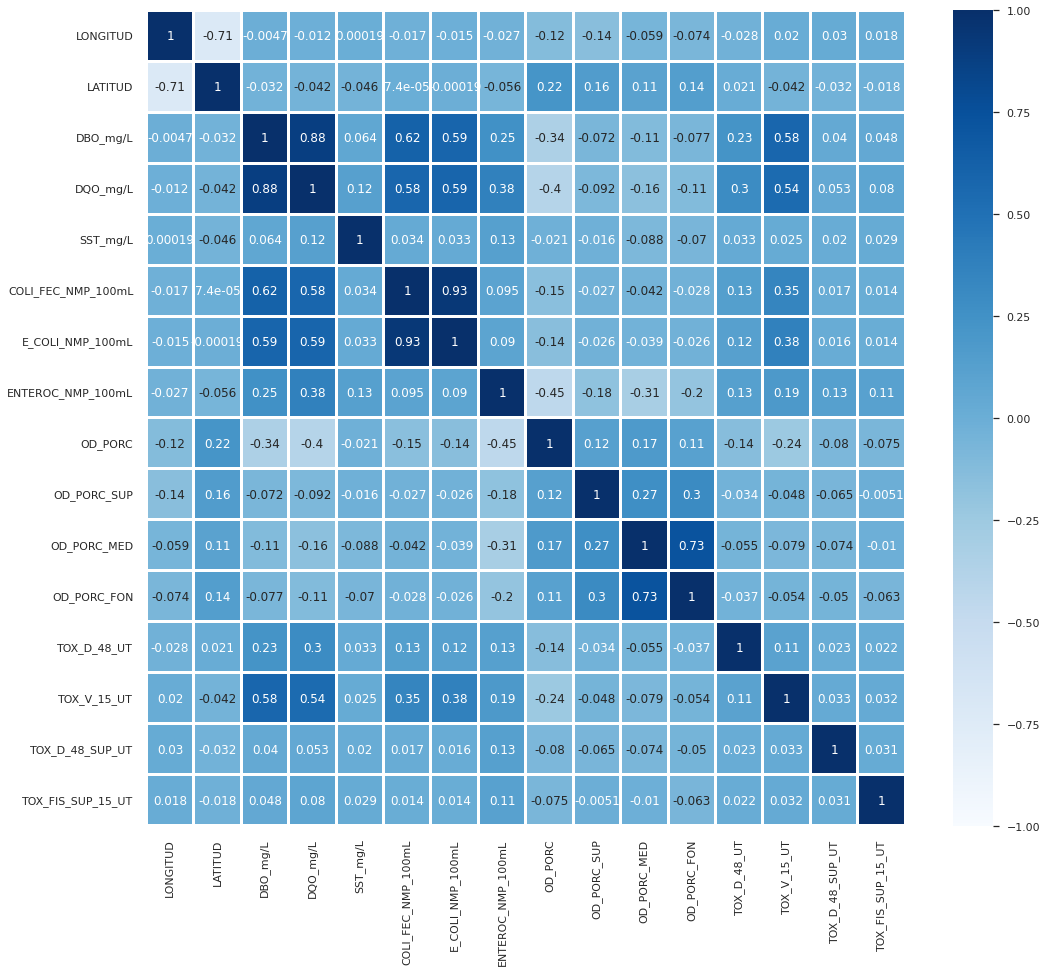

In [222]:
#Visualizamos el mapa de calor de la correlación de las variables numéricas.
df_clean.corr()
mapa = df_clean.corr()
sns.set(rc = {'figure.figsize':(17,15)})
sns.heatmap(mapa, vmin = -1, vmax = 1, cmap = "Blues", annot= True, linewidths = 2)

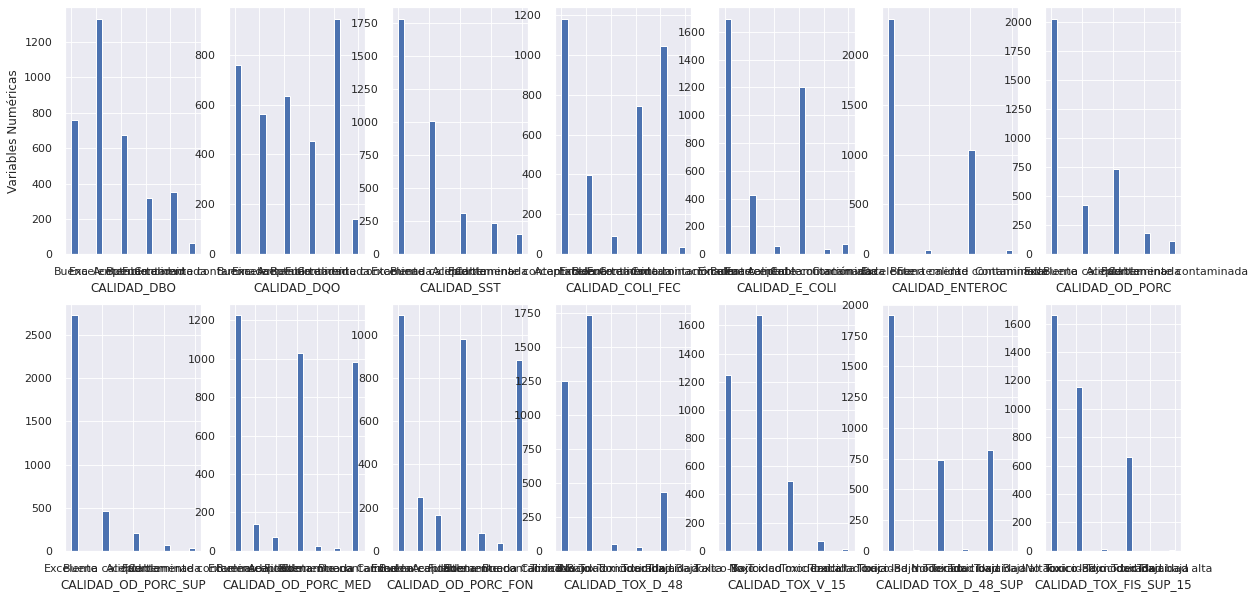

In [223]:
#A continuación se presentan las gráficas de barra para las variables numéricas, y ver si existen outliers y su distribución,
#se creó una nueva variable para agruparlas, ya que anterioremente borramos dos variables.


Categoricas_graph = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']


sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2, 7)   
for k in range(0,14):  
  plt.subplot(2,7,k+1) 

  Transf0 = df_clean[Categoricas_graph].iloc[:,k].to_numpy().reshape(-1, 1) 
  plt.hist(Transf0, bins=20) 
  plt.xlabel(Categoricas_graph[k])

 
  if k==0:
    plt.ylabel('Variables Numéricas')

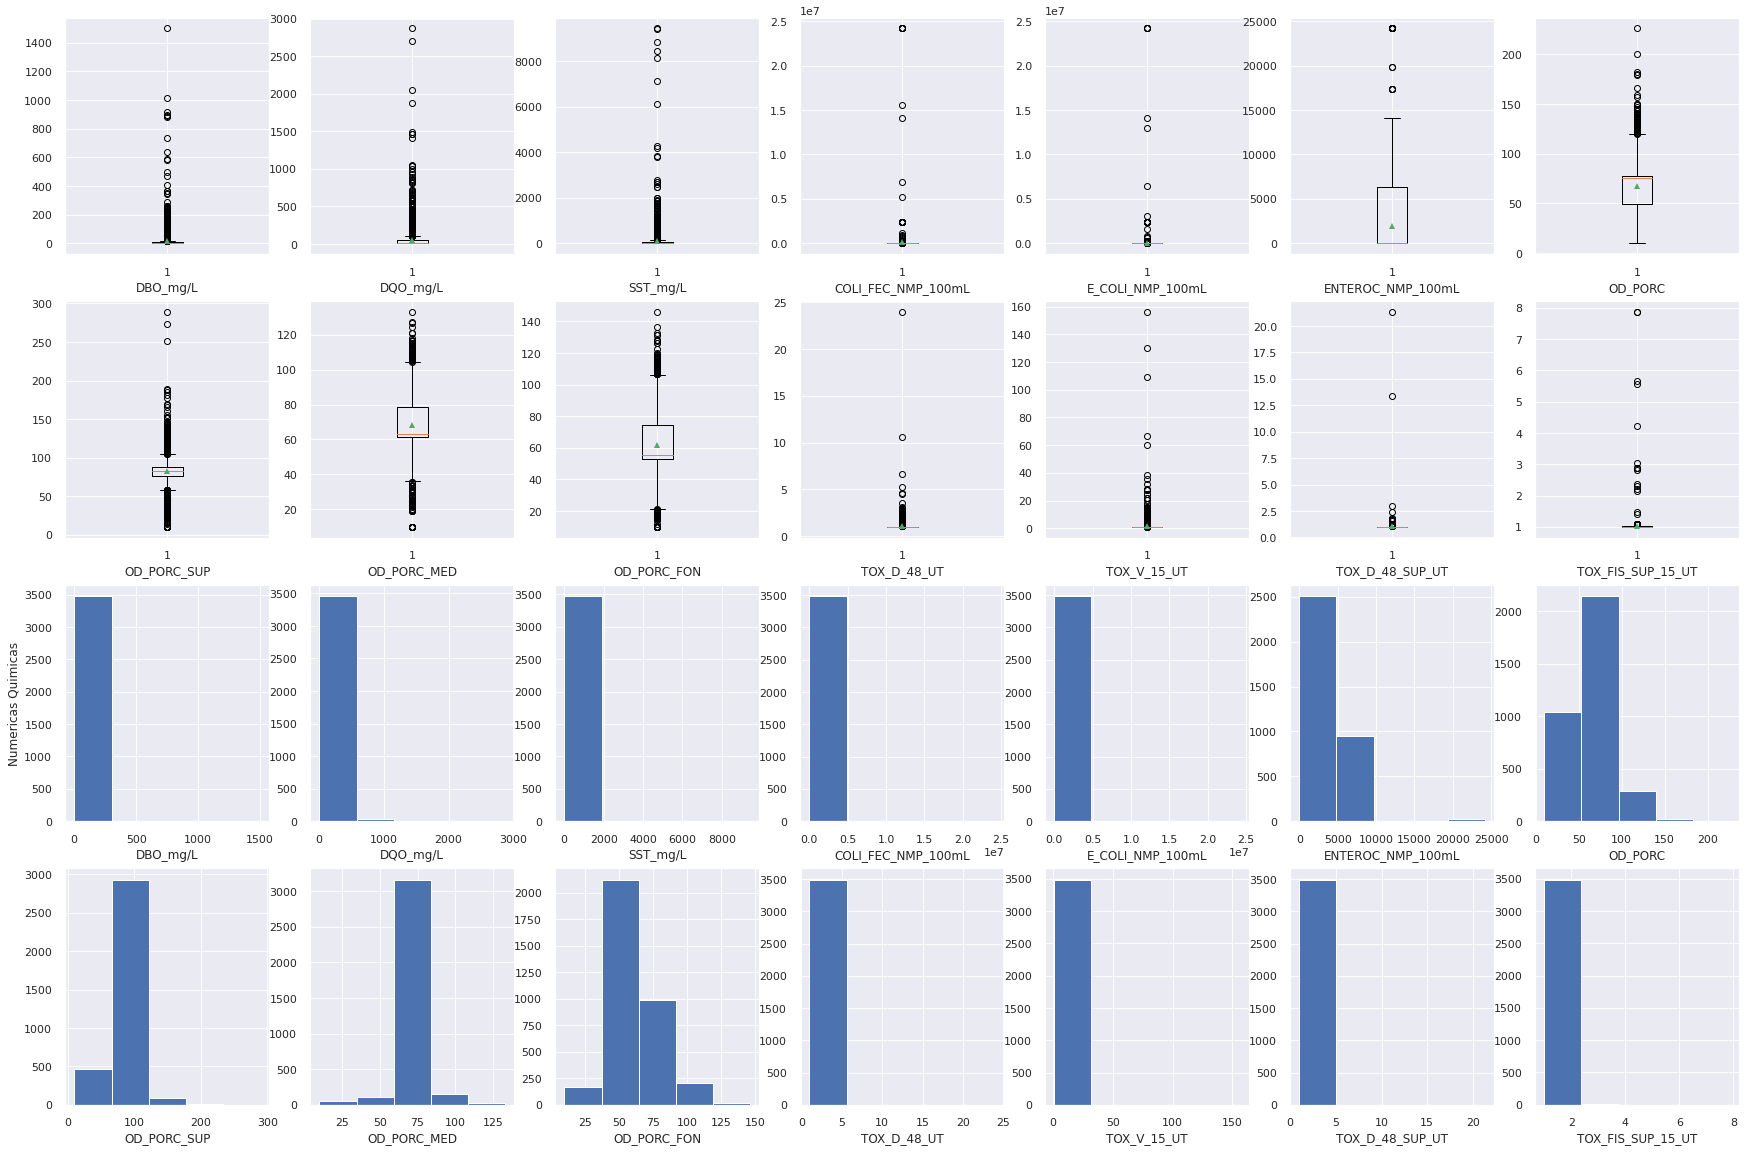

In [224]:
#Hacemos lo mismo pero ahora con las variables Categóricas

Numericas_graph = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

sns.set(rc={'figure.figsize':(30,20)})
fig, axes = plt.subplots(4, 7)   
for k in range(0,14):  
  plt.subplot(4,7,k+1) 

  Transf0 = df_clean[Numericas_graph].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.boxplot(Transf0, showmeans= True) 
  plt.xlabel(Numericas_graph[k])

  plt.subplot(4,7,k+15) 

  Transf0 = df_clean[Numericas_graph].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=5) 
  plt.xlabel(Numericas_graph[k])


  if k==0:
    plt.ylabel('Numericas Quimicas')

##**K means**

In [225]:
#Creamos un lista para asignar un valor numérico a los colores del semáforo y dejar de trabajar un rato con variables string
lbe = LabelEncoder()
df_clean["SEMAFORO_Type"]= lbe.fit_transform(df_clean["SEMAFORO"])
df_clean["SEMAFORO_Type"].unique()

#De acuerdo al arreglo de resultado, queda Verde[2], Amarillo[0], Rojo[1]

array([2, 0, 1])

In [226]:
df_clean[['SEMAFORO','SEMAFORO_Type']]

,SEMAFORO,SEMAFORO_Type
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
...,...,...
3479,Rojo,1
3481,Rojo,1
3483,Rojo,1
3489,Rojo,1


In [227]:
#Tranformaciones para GeoDataFrame, ya trabjando sobre la Latitud y la Longitud
df_clean["Coordinates"] = list(zip(df_clean.LONGITUD, df_clean.LATITUD))
df_clean["Coordinates"] = df_clean["Coordinates"].apply(Point)

Kdf_Superficiales = gpd.GeoDataFrame(df_clean, geometry="Coordinates") #Predicciones
gdf_Superficiales = gpd.GeoDataFrame(df_clean, geometry="Coordinates") #Valores Reales

Kdf_Superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,SEMAFORO_Type,Coordinates
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.89657 22.87694)
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.90250 22.88000)


In [228]:
#Variable del mundo para encontrar a Mexico y poder graficarlo
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

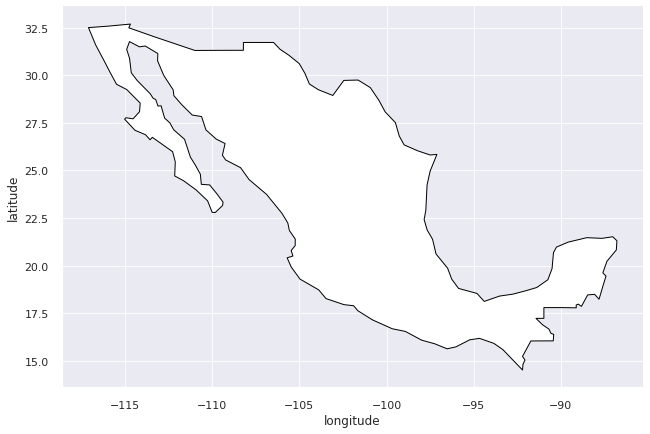

In [229]:
fig, gax = plt.subplots(figsize=(17,7))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

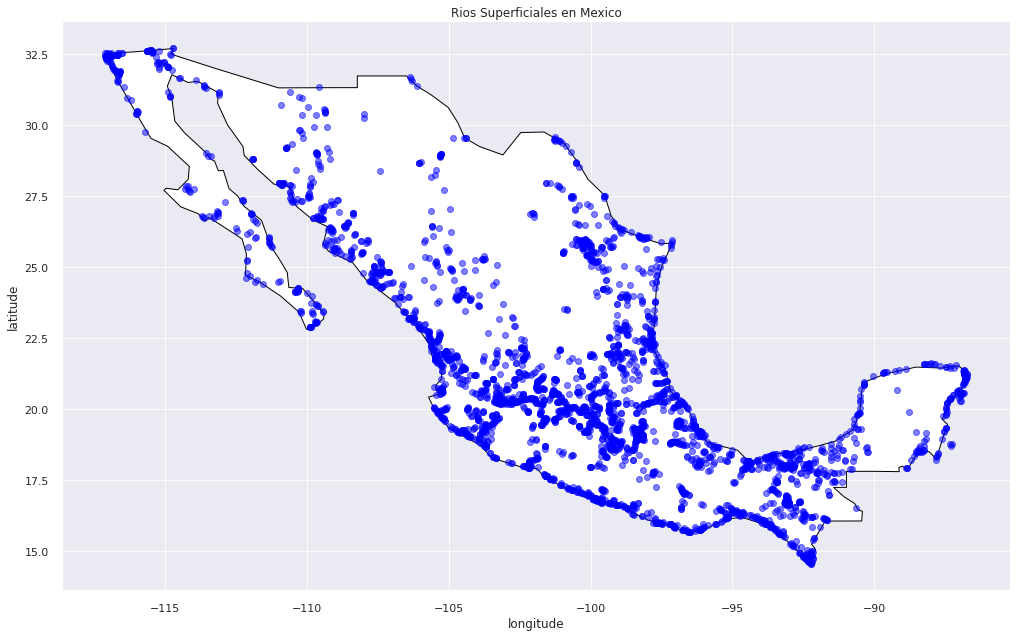

In [230]:
#Graficamos las latitudes y longited de los datos de Aguas Superficiales dados 
fig, gax = plt.subplots(figsize=(17,17))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Kdf_Superficiales.plot(ax=gax, color='Blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Rios Superficiales en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [231]:
#Y sacamos las coordenadas de cada uno
X_Coordenadas = df_clean[["LATITUD","LONGITUD"]]
X_Coordenadas

,LATITUD,LONGITUD
1,22.90473,-109.84290
2,22.89880,-109.86442
3,22.89609,-109.88604
4,22.87694,-109.89657
5,22.88000,-109.90250
...,...,...
3479,26.04574,-98.28476
3481,26.19254,-98.92999
3483,26.05497,-98.27113
3489,27.43714,-99.53064


In [232]:
#Asignamos nuestra variable de salida
Y = df_clean[["SEMAFORO_Type"]]
Y

,SEMAFORO_Type
1,2
2,2
3,2
4,2
5,2
...,...
3479,1
3481,1
3483,1
3489,1


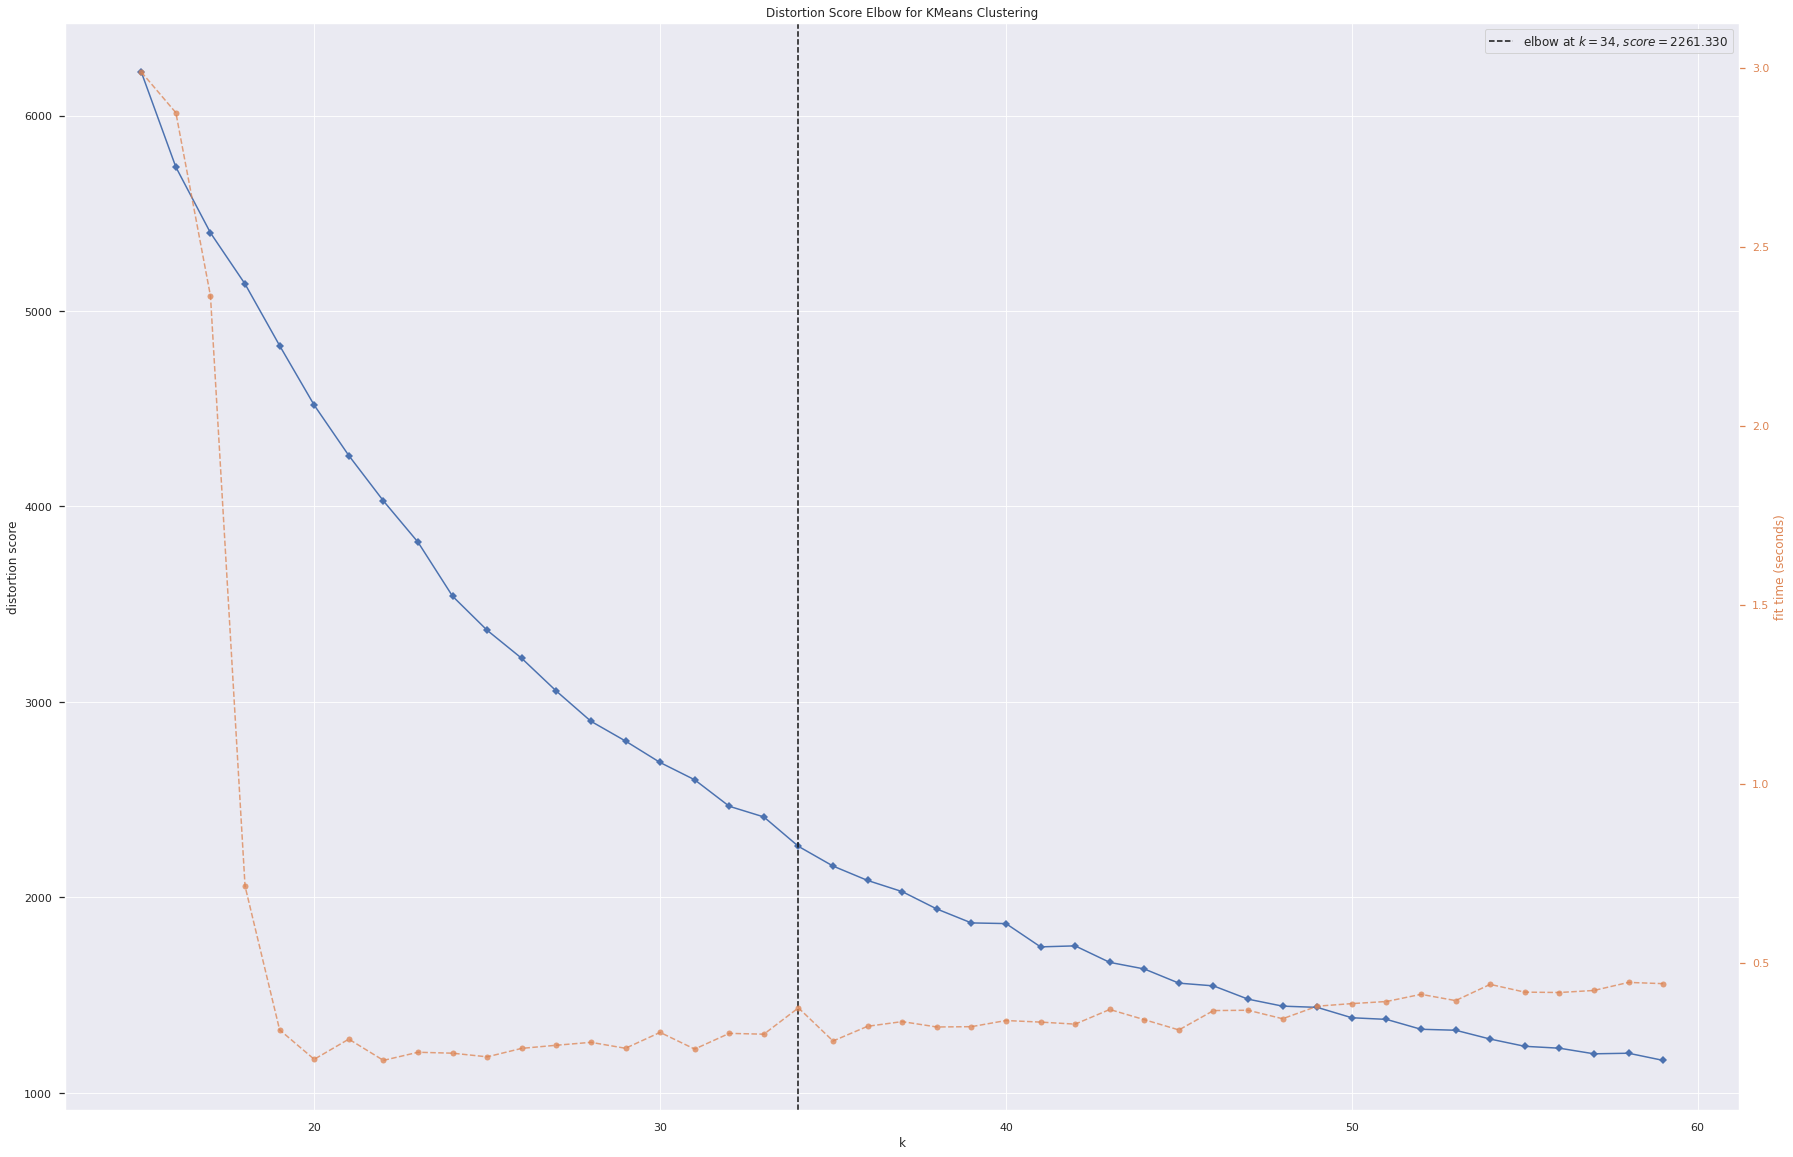

In [233]:
long_lat=list(zip(df_clean.LATITUD, df_clean.LONGITUD))

blob_centers = long_lat

#Se crean las entradas y las salidas en base al n_samples (renglones del dataset)
X_Coordenadas_blobs, Y_blobs = make_blobs(n_samples=3493, centers=blob_centers, cluster_std=0.20,
                  random_state=42)
# Se usa el modelo KElbowVisualizer para encontrar el mejor valor de k y saber cuántos clusters se tienen que hacer y cuántos almacenes se pueden proponer
#El valor de k a buscar va entre 15 y 70 porque no podemos tener un valor muy bajo

model = KElbowVisualizer(KMeans(), k=(15,60))
model.fit(X_Coordenadas_blobs)
model.show()

In [234]:
#En este caso el valor de k33, y usaremos este valor para el entrenamiento de las entradas y las predicciones de la salida.
k = model.elbow_value_

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_Coordenadas,Y)
Y_Z=pd.DataFrame(y_pred)
Y_Z.value_counts()

1     232
16    202
11    185
14    174
32    165
24    162
13    145
2     140
3     133
23    125
31    124
5     121
4     113
22    110
10    108
30    107
0      96
27     95
7      92
12     88
33     77
8      76
17     74
26     72
15     72
25     69
9      54
29     50
20     48
19     42
21     41
6      39
28     32
18     30
dtype: int64

In [235]:
#Creamos un nuevo dataframe para basarnos en el número de Clusters encontrado
C = kmeans.cluster_centers_

Cluster_df = pd.DataFrame(C)
Cluster_df["Coordinates"] = list(zip(Cluster_df[1], Cluster_df[0]))
Cluster_df["Coordinates"] = Cluster_df["Coordinates"].apply(Point)

labels = kmeans.predict(X_Coordenadas)

gdf_C_superficiales = gpd.GeoDataFrame(Cluster_df, geometry="Coordinates")
gdf_C_superficiales['Numero de Cluster']='hola'
z=0
while z<k:
  gdf_C_superficiales['Numero de Cluster'][z]=z
  z=z+1

gdf_C_superficiales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,Coordinates,Numero de Cluster
0,26.247941,-108.881303,POINT (-108.88130 26.24794),0
1,18.866967,-98.670189,POINT (-98.67019 18.86697),1
2,17.985169,-93.887770,POINT (-93.88777 17.98517),2
3,20.443346,-103.174599,POINT (-103.17460 20.44335),3
4,25.749676,-99.951937,POINT (-99.95194 25.74968),4
5,32.041546,-115.968500,POINT (-115.96850 32.04155),5
6,18.690294,-88.122346,POINT (-88.12235 18.69029),6
7,21.690010,-99.307291,POINT (-99.30729 21.69001),7
8,22.815118,-105.886409,POINT (-105.88641 22.81512),8
9,28.015006,-110.522207,POINT (-110.52221 28.01501),9


In [236]:
#Creamos un arreglo para poner la cantidad de Clusters encontrados
Qty_cluster= list()
for row in gdf_C_superficiales['Numero de Cluster'] :
    Qty_cluster.append(gdf_C_superficiales['Numero de Cluster'][row])

print(Qty_cluster)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [237]:
#Creamos 2 dataframes

#num_clusters - Con los datos principales, Latitud, Longitud, cluster al que pertenece y valor de semáforo

# grupo_cluster - Relación de aguas superficiales por cluster

referencias=[]

for z in Qty_cluster:
  referencias.append(Qty_cluster[z])
referencias

num_cluster =  pd.DataFrame()
num_cluster['Latitud']=df_clean['LATITUD'].values
num_cluster['Longitud']=df_clean['LONGITUD'].values
num_cluster['NUMCLUSTER'] = y_pred
num_cluster['Semáforo'] = df_clean['SEMAFORO_Type'].values

grupo_cluster =  pd.DataFrame()
grupo_cluster['NUMCLUSTER']=referencias
grupo_cluster['Cuerpos de agua a Predecir por Contaminación']=num_cluster.groupby('NUMCLUSTER').size()
grupo_cluster



,NUMCLUSTER,Cuerpos de agua a Predecir por Contaminación
0,0,96
1,1,232
2,2,140
3,3,133
4,4,113
5,5,121
6,6,39
7,7,92
8,8,76
9,9,54


In [238]:
num_cluster

,Latitud,Longitud,NUMCLUSTER,Semáforo
0,22.90473,-109.84290,20,2
1,22.89880,-109.86442,20,2
2,22.89609,-109.88604,20,2
3,22.87694,-109.89657,20,2
4,22.88000,-109.90250,20,2
...,...,...,...,...
3488,26.04574,-98.28476,17,1
3489,26.19254,-98.92999,4,1
3490,26.05497,-98.27113,17,1
3491,27.43714,-99.53064,19,1


In [239]:
#Con num_cluster vamos a sacar un valor de Contaminación por cluster con el fin de empezar a agrupar

from statistics import mode

valor_contam_sem=list()
d = {}
for name in Qty_cluster:
    d[name] = pd.DataFrame()
    d[name] = num_cluster[num_cluster.NUMCLUSTER == name].copy()
    promedio=d[name]['Semáforo'].mode()[0]
    if(promedio>1.7):
      promedio_int=math.ceil(promedio)
    else: 
      promedio_int=math.floor(promedio)
    valor_contam_sem.append(promedio_int)

valor_contam_sem


[2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2]

In [240]:
Kdf_Superficiales[["LONGITUD","LATITUD","SEMAFORO","SEMAFORO_Type"]]

,LONGITUD,LATITUD,SEMAFORO,SEMAFORO_Type
1,-109.84290,22.90473,Verde,2
2,-109.86442,22.89880,Verde,2
3,-109.88604,22.89609,Verde,2
4,-109.89657,22.87694,Verde,2
5,-109.90250,22.88000,Verde,2
...,...,...,...,...
3479,-98.28476,26.04574,Rojo,1
3481,-98.92999,26.19254,Rojo,1
3483,-98.27113,26.05497,Rojo,1
3489,-99.53064,27.43714,Rojo,1


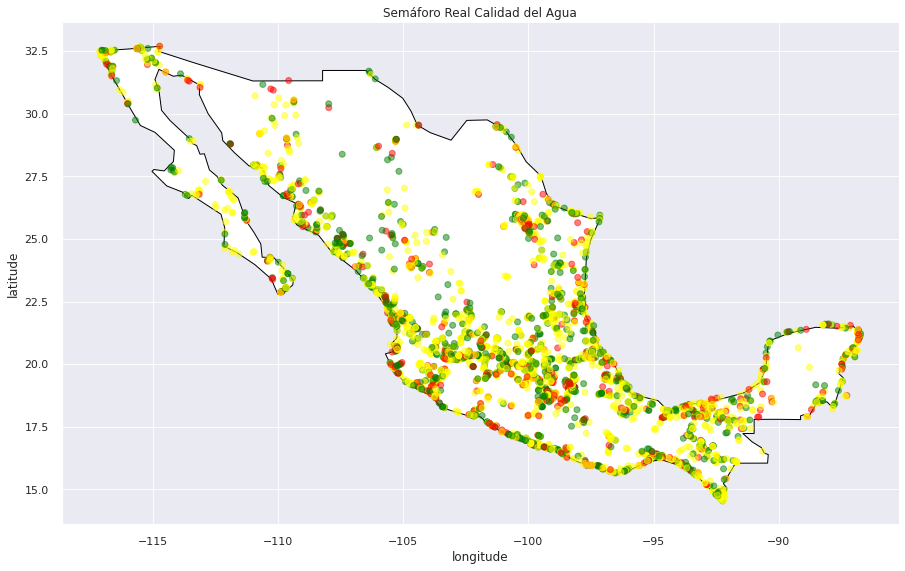

In [241]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(X_Coordenadas_blobs, Y_blobs)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.predict(X_Coordenadas_blobs)
# Getting the cluster centers
C2 = kmeans2.cluster_centers_

C2_DF = pd.DataFrame(C2)
C2_DF["Coordinates"] = list(zip(C2_DF[0], C2_DF[1]))
C2_DF["Coordinates"] = C2_DF["Coordinates"].apply(Point)


gdf_C_superficiales_2 = gpd.GeoDataFrame(C2_DF, geometry="Coordinates")

fig, gax = plt.subplots(figsize=(15,10))

colores2 = ['green','red','yellow']

color_asig2 = []

for row in labels2:
  color_asig2.append(colores2[row])

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_Superficiales.plot(ax=gax, color=color_asig2, alpha = 0.5)
#gdf_C_superficiales_2.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semáforo Real Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

#Obtenemos la gráfica general de los valores del agua e acuerdo a su color de semáforo

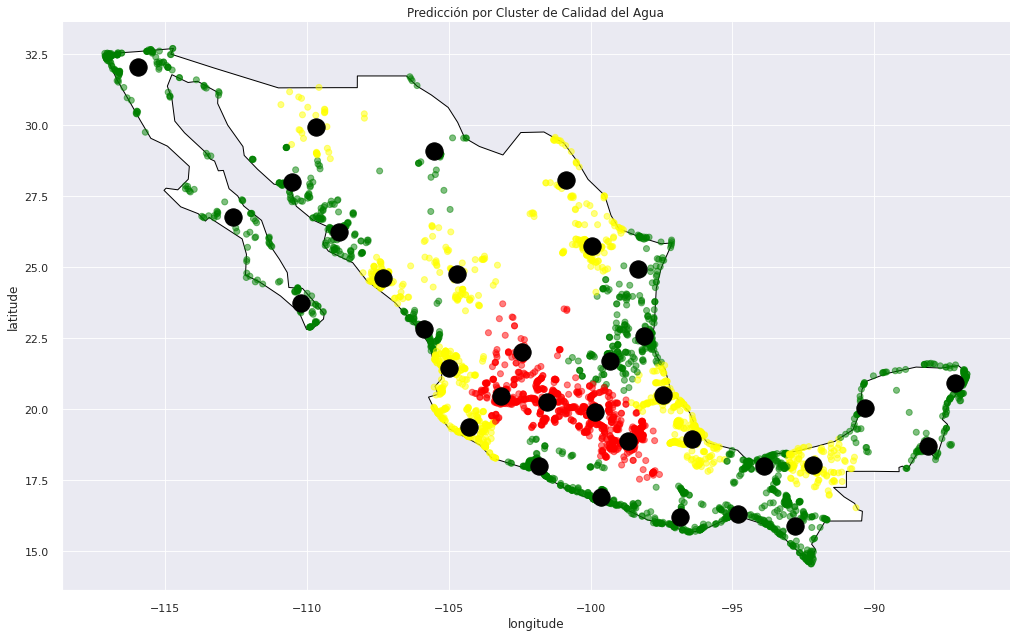

In [242]:
#Hacemos la gráfica en el mapa para saber dónde queda cada cuerpo y el cluster

from sklearn.utils.extmath import row_norms
fig, gax = plt.subplots(figsize=(17,17))


colores = []
color_asig = []

#Loos valores de los colores corresponder al valor del arreglo previamente obtenido
for numeros in valor_contam_sem:
  if (numeros==1.0):
    colores.append('red')
  if (numeros==2.0):
    colores.append('green')
  if (numeros==0.0):
    colores.append('yellow')    

for row in y_pred:
  color_asig.append(colores[row])


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Kdf_Superficiales.plot(ax=gax, color=color_asig, alpha = 0.5)
gdf_C_superficiales.plot(ax=gax, color='black', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Predicción por Cluster de Calidad del Agua')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


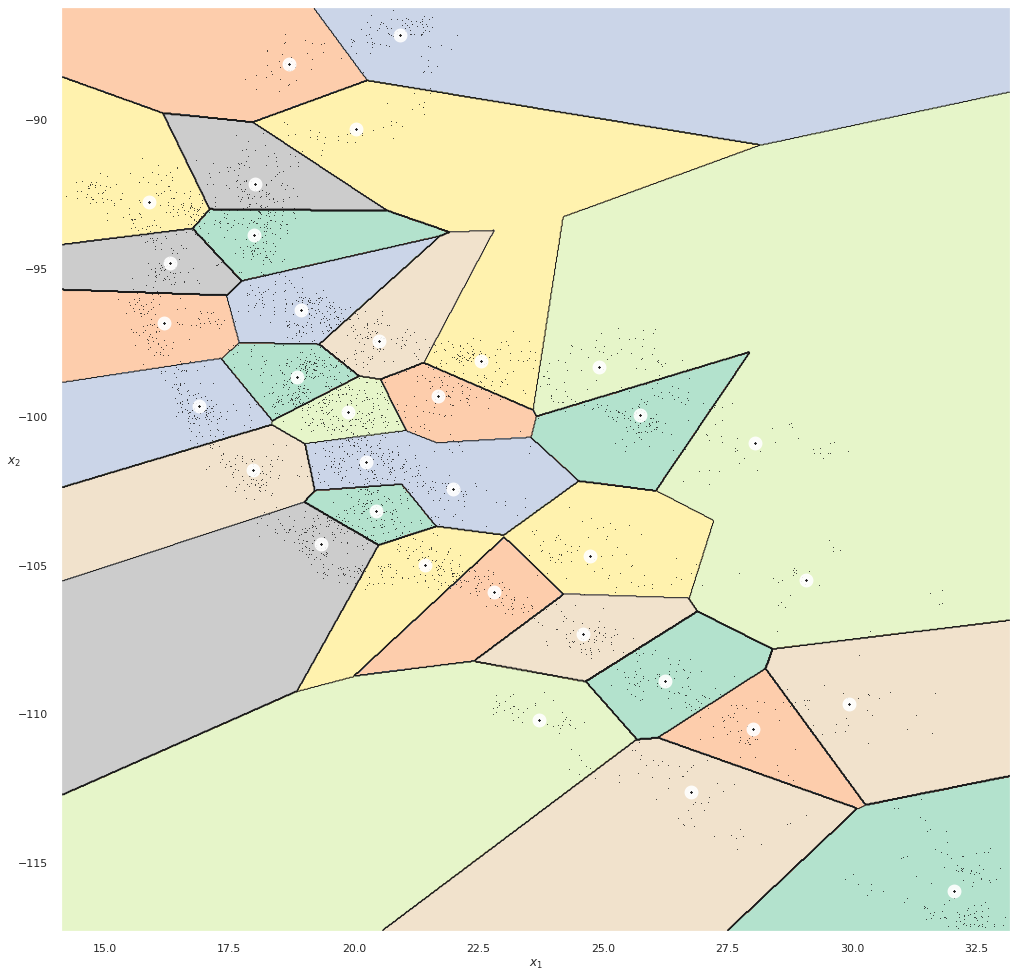

In [243]:
#Y al final graficamos la frontera:

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    W=Z

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(17, 17))
plot_decision_boundaries(kmeans, X_Coordenadas_blobs)
#plt.plot(world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white'))
plt.show()





**Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means**

Una vez realizado el análisis a través de K- means, se puede observar una relación entre los centros (o grupos) y la calidad del agua. Si bien no existe de alguna forma un centro específico para cada diferencia o referencia en la calidad del agua (es decir, que el país solo tenga tres grupos), sí se identifican ciertos patrones, dependiendo la latitud y longitud respecto a qué tan buena o mala es el agua. Podemos observar, por ejemplo, que por la zona centro (longitud -98 a -104, latitud 18 a 22.5, con cinco grupos en la zona) se tiene la mayor concentración de agua contaminada (tóxico-bajo), es decir, los puntos de color rojo. Por otro lado, observamos que, en su mayoría, alrededor de las costas se tienen grupos cuyas aguas relativas poseen una calidad excelente, en la zona de Tamaulipas (longitud -100, latitud 22 a 26, con dos grupos), Campeche, Yucatán, Chiapas, Guerrero, Jalisco, Nayarit, Chihuahua y Baja california (20 grupos para las zonas con agua de excelente calidad). Respecto los lugares donde la calidad el agua es decente, se observa un patrón también en la costa, relativo a Veracruz (longitud -64 a-98, latitud 18 a 23), Oaxaca, Michoacán, Sinaloa, Tamaulipas, Nuevo León y Sonora, donde la única concentración céntrica (o alejada de la costa) que no es agua de mala calidad, corresponde al centro cuya longitud yace en -105 y de latitud 25 (con 10 grupos totales para las zonas con agua de calidad aceptable).

## Clasificación-ensambles

In [254]:
#definimos función de Accuracy
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)
   

#definimos función de Precisión
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  result = (vp)/(vp+fp+np.finfo(np.float32).eps)  
  return result



#definimos función de Recall
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3
  
  return (vp)/(vp+fn+np.finfo(np.float32).eps)

#definimos función de g-mean
def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3
    
    recall = vp / (vp+fn+np.finfo(np.float32).eps)
    especificidad = vn / (vn+fp+np.finfo(np.float32).eps)
    gmean = np.sqrt(recall * especificidad)

    return gmean

#definimos función de f1score
def mi_fscore(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3 
    
    return (2*vp)/((2*vp)+fp+fn+np.finfo(np.float32).eps)


my_accuracy = make_scorer(mi_accuracy)
my_precision = make_scorer(mi_precision)
my_recall = make_scorer(mi_recall)
my_fscore = make_scorer(mi_fscore)
my_gmean = make_scorer(mi_gmean)

mismetricas = {"Accuracy":my_accuracy,"Precision":my_precision,"Recall":my_recall,"F1Score":my_fscore,"Gmean":my_gmean}

In [244]:
#Realizamos una copia del dataframe limpio
DF=df_clean.copy()
DF.drop('CLAVE',axis='columns',inplace=True)

In [245]:
#Creamos una lista que contiene todas las variables categóricas de dataframe
categoricalVars = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC',
               'CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED', 'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48',
               'CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15','CUMPLE_CON_DBO','CUMPLE_CON_DQO',
               'CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX',
               'ESTADO','MUNICIPIO','TIPO','SUBTIPO','SITIO','ORGANISMO_DE_CUENCA','CUENCA','CUERPO DE AGUA','GRUPO'
               ]

#Dataframe previo a la codificación de las variables categóricas
DF.head(3)

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,...,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,SEMAFORO_Type,Coordinates
1,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.84290 22.90473)
2,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.86442 22.89880)
3,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,...,SI,SI,SI,SI,SI,SI,SI,COSTERO,2,POINT (-109.88604 22.89609)


In [246]:
#Selecciona tus variables independientes X y dependiente Y (semáforo)
Numericas_class = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

Categoricas_class = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']

Categoricas_gen_class = ['ESTADO','MUNICIPIO','TIPO','SUBTIPO']

X =  DF[Numericas_class + Categoricas_class + Categoricas_gen_class]

#Definimos las variable de Salida
y = DF[['SEMAFORO_Type']]

print('Variables en X',X.columns)
print('-'*100)
print('Variable y',y.columns)

Variables en X Index(['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL',
       'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP',
       'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT',
       'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT', 'CALIDAD_DBO', 'CALIDAD_DQO',
       'CALIDAD_SST', 'CALIDAD_COLI_FEC', 'CALIDAD_E_COLI', 'CALIDAD_ENTEROC',
       'CALIDAD_OD_PORC', 'CALIDAD_OD_PORC_SUP', 'CALIDAD_OD_PORC_MED',
       'CALIDAD_OD_PORC_FON', 'CALIDAD_TOX_D_48', 'CALIDAD_TOX_V_15',
       'CALIDAD TOX_D_48_SUP', 'CALIDAD_TOX_FIS_SUP_15', 'ESTADO', 'MUNICIPIO',
       'TIPO', 'SUBTIPO'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Variable y Index(['SEMAFORO_Type'], dtype='object')


In [247]:
#Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
#Este paso ya fue trabajado en el desarollo de K-means con LabelEncoder(), obteniendo los resultados:
#Verde[2], Amarillo[0], Rojo[1]

#Por tanto, en y se selcciona nuestra variable 'SEMAFORO_Type', cuyas etiquetas ya fueron codificadas
DF[['SEMAFORO','SEMAFORO_Type']]

,SEMAFORO,SEMAFORO_Type
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
...,...,...
3479,Rojo,1
3481,Rojo,1
3483,Rojo,1
3489,Rojo,1


In [248]:
#Verificamos a nuestra variable y
y.sample(10)

,SEMAFORO_Type
1463,0
1775,0
579,0
1755,2
2092,2
2256,2
838,0
2146,2
511,1
2349,2


In [249]:
#Partición de los datos de manera balanceada
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f'Número total de registros en la base de datos: {len(X)}')
print("-"*50)
print(f'Número total de registros en el training set: {len(Xtrain)}')
print(f'Tamaño de Xtrain: {Xtrain.shape}')
print("-"*50)
print(f'Número total de registros en el test dataset: {len(Xtest)}')
print(f'Tamaño del Xtest: {Xtest.shape}')

Número total de registros en la base de datos: 3493
--------------------------------------------------
Número total de registros en el training set: 2794
Tamaño de Xtrain: (2794, 32)
--------------------------------------------------
Número total de registros en el test dataset: 699
Tamaño del Xtest: (699, 32)


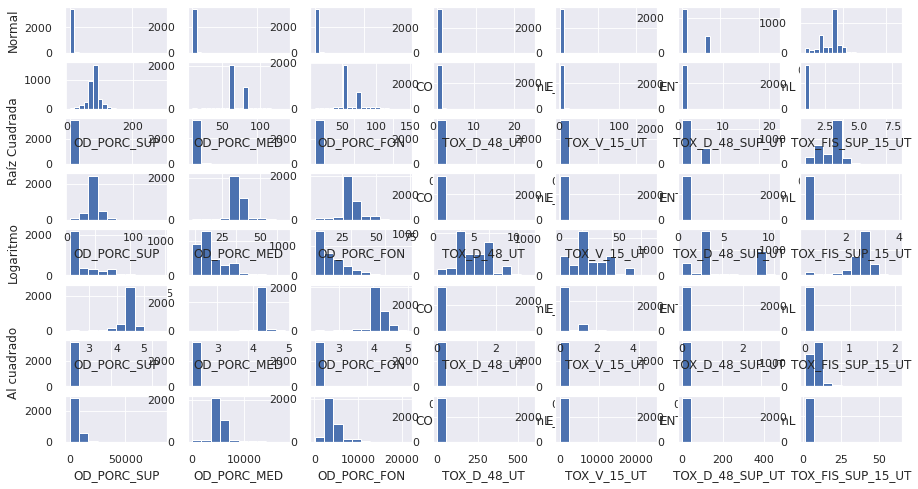

In [250]:
#Revisamos los datos numéricos para saber si tenemos sesgos

sns.set(rc={'figure.figsize':(15,8)})
fig, axes = plt.subplots(8, 7)   
for k in range(0,14):  
  plt.subplot(8,7,k+1) 

  Transf0 = df_clean[Numericas_class].iloc[:,k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(Numericas_class[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(8,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(Numericas_class[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')    

  plt.subplot(8,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(Numericas_class[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(8,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(Numericas_class[k])
  if k==0:
    plt.ylabel('Al cuadrado')
     
plt.show()

In [262]:
#Creamos el pipeline

numericas_pipeline = Pipeline(steps = [('Escalar', MinMaxScaler(feature_range=(1,3))) ,
                                         ('Logaritmo', FunctionTransformer(np.log))])  
                                                        #Por el tipo de sesgo de estos datos, usamos la función logarítmica
numericas_nombres = Numericas_class

categoricas_pipeline = Pipeline(steps = [('LE', OneHotEncoder(handle_unknown='ignore'))]) 
categoricas_nombres = Categoricas_class

cat_gen_pipeline = Pipeline(steps = [('LE', OneHotEncoder(handle_unknown='ignore'))])
cat_gen_nombres = Categoricas_gen_class


ColumnasTransformer = ColumnTransformer(transformers = [('numerica', numericas_pipeline, numericas_nombres),
                                         ('categorica', categoricas_pipeline,categoricas_nombres),
                                         ('catgen', cat_gen_pipeline,cat_gen_nombres),
                                                       ],  remainder='passthrough')

In [279]:
#Árbol de decisión
modeloDT = DecisionTreeClassifier() #hiperparámetros predeterminados

#Hacemos la búsqueda de los mejores parámetros, solo definimos un valor de alpha para que no tarde mucho el modelo

dicc_gridDT = {'m__ccp_alpha':[0.001],
              'm__criterion':['gini','entropy'],
              'm__max_depth':[1,5,15,20],
              'm__min_samples_split':[3,5,10],
              'm__class_weight':['balanced'],
                           }
           
pipeline = Pipeline(steps=[('CT',ColumnasTransformer),('m',modeloDT)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridDT = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_gridDT, 
                    cv=cv, 
                    scoring= make_scorer(mi_accuracy))


gridDT.fit(Xtrain, yTrain)
gridDT.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT.best_params_)
print('Métrica utilizada:', gridDT.scoring)

Mejor valor obtenido con la mejor combinación: 0.9993639434789249
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.001, 'm__class_weight': 'balanced', 'm__criterion': 'entropy', 'm__max_depth': 5, 'm__min_samples_split': 3}
Métrica utilizada: make_scorer(mi_accuracy)


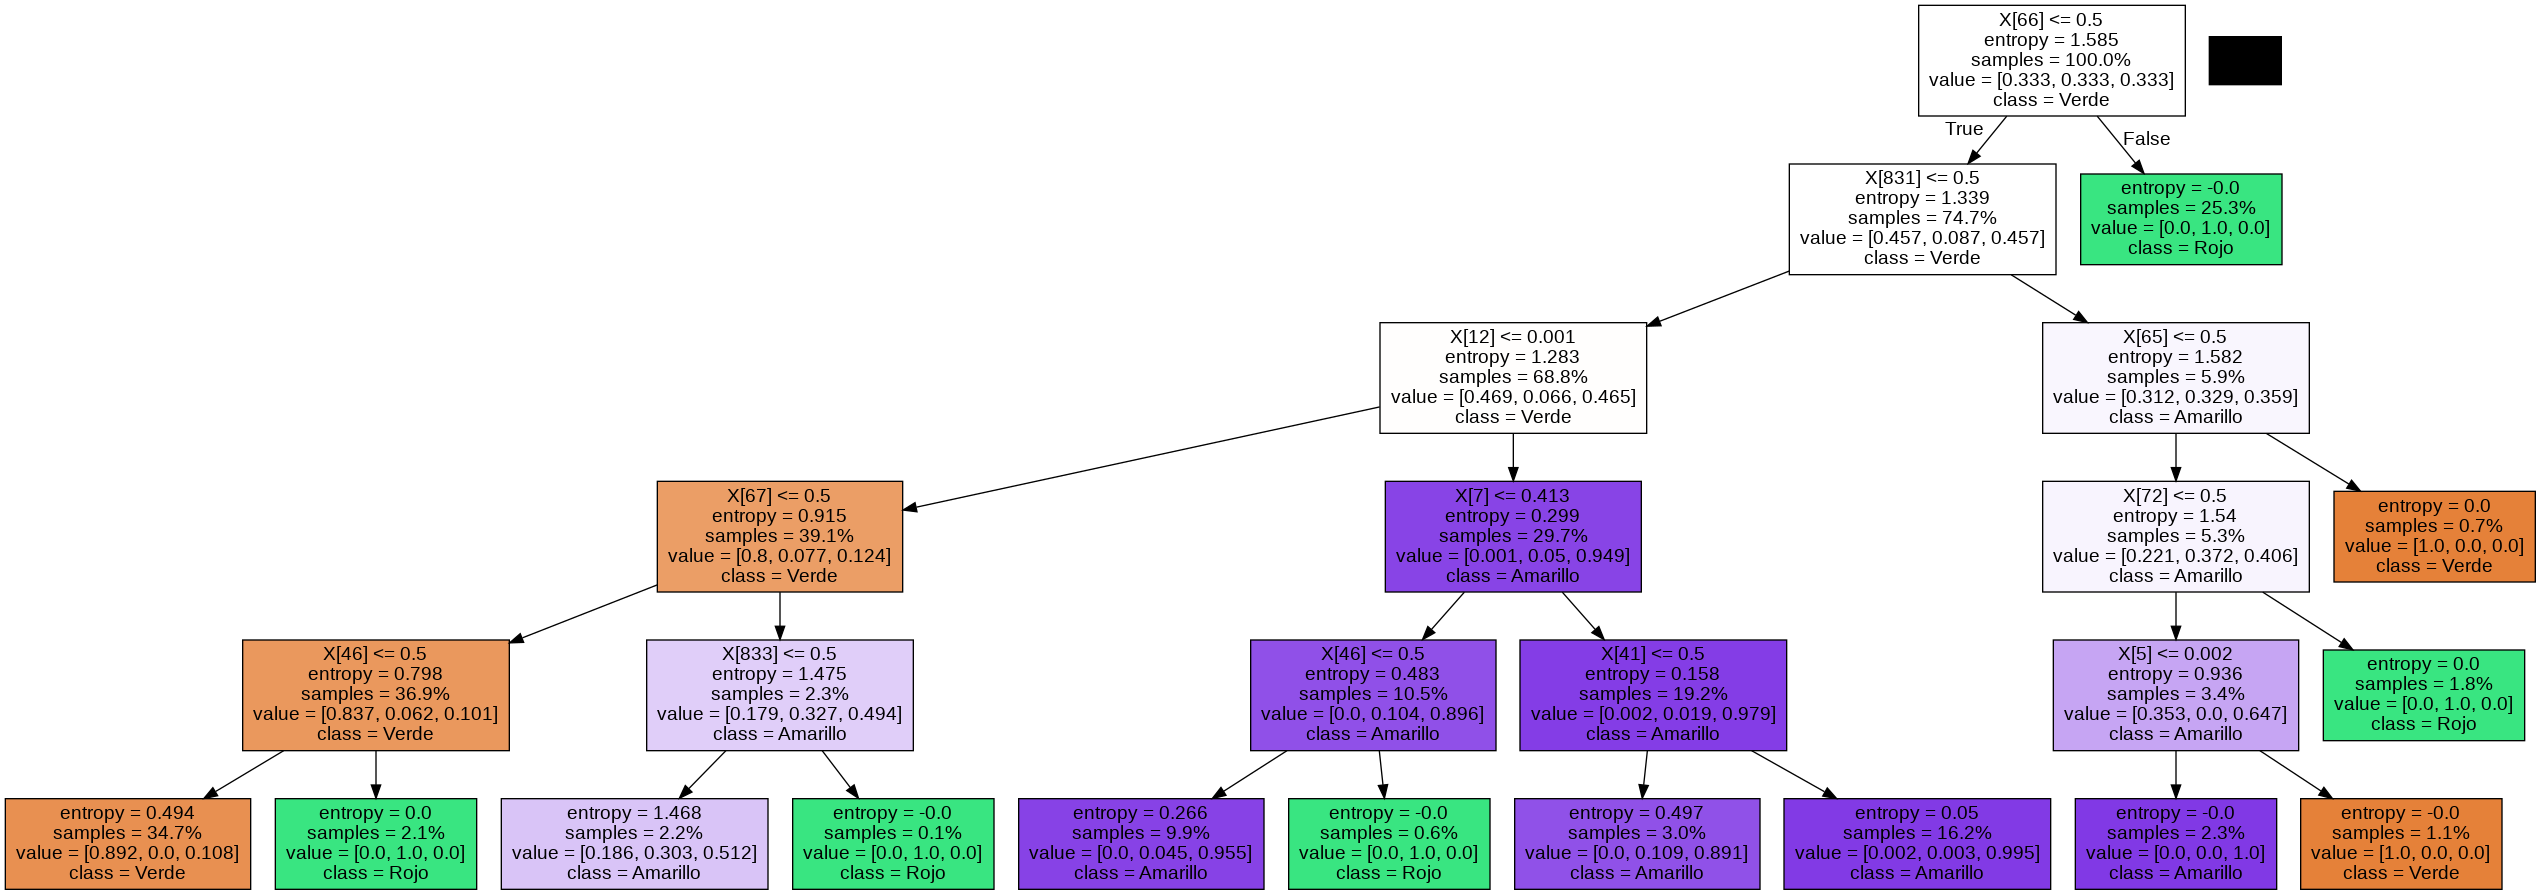

In [281]:
#Con los mejores hiperparámetros que se encontraron en la función anterior procedemos a graficar el árbol de decisión obtenido

modeloDT_Final = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 'sqrt')
Xct = ColumnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
modeloDT_Final.fit(Xxt, yTrain)


data_tree = tree.export_graphviz(decision_tree=modeloDT_Final, 
                                out_file=None,
                                max_depth=gridDT.best_params_.get('m__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph = pydotplus.graph_from_dot_data(data_tree)
Image(graph.create_png())